## **Statistical Learning – Data science - 2021/22 – Exercise 1 - 15/03/2022**
# **Exercise 1: Telco Customer Churn first data analysis using Python**

## **AIM**:
> The aim of this analysis is to predict behavior to retain customers.

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python

# data analysis and wrangling
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import random as rnd

# visualization
import seaborn as sns
import matplotlib.pyplot as plt
# %matplotlib inline

# machine learning
from sklearn.linear_model import LogisticRegression
# from sklearn.metrics import r2_score
# from sklearn.metrics import mean_squared_error

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/telco-customer-churn/WA_Fn-UseC_-Telco-Customer-Churn.csv


In [2]:
# Automatically Wrap Graph Labels in Matplotlib and Seaborn
# source: https://medium.com/dunder-data/automatically-wrap-graph-labels-in-matplotlib-and-seaborn-a48740bc9ce
import textwrap
def wrap_labels(ax, width, break_long_words=False):
    labels = []
    for label in ax.get_xticklabels():
        text = label.get_text()
        labels.append(textwrap.fill(text, width=width,
                      break_long_words=break_long_words))
    ax.set_xticklabels(labels, rotation=0)

## **1. Open the Telco Customer Churn dataset page in Kaggle.**
> <h2>✅</h2>

## **2. Check the main properties of this dataset in the “Data” tab.**
* How many samples (rows) does it have?
> The number of samples (rows) is:  7043
* How many variables (columns)?
> The number of variables (columns) is:  21
* What does each row/column represent?
Each row represents a customer, each column contains customer’s attributes.
The data set includes information about:
    * **Customers who left within the last month:**\
    the column is called "Churn"
    * **Services that each customer has signed up for:**\
    phone, multiple lines, internet, online security, online backup,device protection, tech support, and streaming TV and movies
    * **Customer account information:**\
    how long they’ve been a customer, contract, payment method,paperless billing, monthly charges, and total charges
    * **Demographic info about customers:**\
    gender, age range, and if they have partners and dependents
* Which is the “target” column? What does it represent?
> The target column is the "Churn"-column, because we want to predict this kind of behaviour.

## **3. Download the dataset into your computer.**
- Which is the extension of the downloaded file?
> **.zip**

## **4. Uncompress the file**
- Which is the extension of the uncompressed file?
> **.csv**

## **5. Open the uncompressed file by both a text editor and a spreadsheet software**
- Which symbol is used to separate columns?
> The comma!
- Which symbol is used to separate rows?
> New line '\n'!
- Which values can you find for variable SeniorCitizen? And for variable Partner?
> For `SeniorCitizen` the possible value is a boolean variable, where 1 means that the person is a senior citizen and 0 means no.\
> For `Partner` the possibile value is string variable, with `Yes' or 'No'.

## **6. Generate a new notebook for analyzing this dataset**
* Hint: click on “New Kernel”, then choose the Notebook kernel type, on the right
* Assign the following title to the notebook: SL_L1_TelcoCustomerChurn_YourSurname
* Then click on the “Commit” button on top-right to make the notebook ready to be started
> <h2>✅</h2>

## **7. Open the notebook documentation page to get help if needed**
* Hint: click the “Docs” link on the right-bottom of your notebook page
> <h2>✅</h2>

## **8. Select the first cell (we will call it “Library import cell” in the following), run it**
* What is the output of this action?
> It loads some python packages
* What does the code “import numpy as np” do? Can you provide a reference website for this library?
> Running `import numpy as np` I load numpy package, which is useful for linear algebra. You can find a reference [here](https://numpy.org/). 
* What does the code “import pandas as pd” do? Can you provide a reference website for this library?
> Running `import pandas as pd` I load pandas package,m which is useful for data processing, and to handle CSV file I/O (e.g. pd.read_csv). You can find a reference [here](https://pandas.pydata.org/).
* What does the code “import os” do? Can you provide a reference website for this library?
> Running `import os` I load os package, which is useful for operating system functionality. There is a reference [here](https://docs.python.org/3/library/os.html).
* How many data files are available? Please provide their names.
> With os module I can list all the files available, and in our case there's only the file named "/kaggle/input/telco-customer-churn/WA_Fn-UseC_-Telco-Customer-Churn.csv".

## **9. Add to the first cell new lines to load the following libraries: seaborn, matplotlib.pyplot, sklearn.linear_model (only LogisticRegression)**
* Hint: find similar code in the Titanic notebook if needed
> <h2>✅</h2>

## **10. Select the first cell and add a new cell on top of it**
* Hint: use the button on top-right of the cell
> <h2>✅</h2>

## **11. Select the new cell and transform it in a “Markdown” cell, then copy all the text in this pdf file and paste it in the new Markdown cell**
> <h2>✅</h2>

## **12. Please write your answers to the questions above in the new Markdown cell. From now on you can use the same cell to write your answers as well**
> <h2>✅</h2>

## **13. Select the “Library input cell” and add a new cell below it**
> <h2>✅</h2>

## **14. Use the new cell to load the Telco Customer Churn dataset into a Pandas DataFrame variable called data**
* Hint: find similar code in the Titanic notebook if needed
* Remind to run the cell after writing the code-box
> <h2>✅</h2>

## **15. Add the following `comment` before data loading line: “Data acquisition”**
> <h2>✅</h2>

## **16. Add also a `Markdown cell` before the data loading cell and write in bold the text “Data acquisition”**
* Markdown cells should be used to give a structure to the report, hence they should be added before each new section
> <h2>✅</h2>

 # **Data acquisition**

In [3]:
## Data acquisition
data = pd.read_csv('../input/telco-customer-churn/WA_Fn-UseC_-Telco-Customer-Churn.csv')

## **17. In a new cell show the number of rows, the number of columns, and the total number of cells in the dataset**
* Hint: display the related parameters of the `Pandas DataFrame`
* Hint: use the print function to print the results
* You should print, in particular, the following strings:
    * “The number of customers is XXXX”
    * “The number of variables is YYYY”
    * “The total number of cells is ZZZZ”
* Other hints:
    * How can you select a single element from the shape tuple?
    * How can you convert a number to string?
    * How can you concatenate two strings?
    * How can you print the final string?

# **Data Analysis**

In [4]:
#Dataset dimension

[num_rows,num_columns]=data.shape;
num_elements=data.size;
print(f"The number of costumers (rows) is {num_rows}.\n\
The number of variables (columns) is {num_columns}.\n\
The number of elements is {num_elements}.\n")
print("To select a single element from the shape tuple it's enough to assing the return of `data.shape` to two variables.\n\
So I get a single element by calling one of them.\n\n\
I can convert a number to string by call the method `str`.\n\
I can concatenate two strings by using `+` between the two strings and I print the final string by calling `print` with the argument `\"string1\"+\"string2\"")

The number of costumers (rows) is 7043.
The number of variables (columns) is 21.
The number of elements is 147903.

To select a single element from the shape tuple it's enough to assing the return of `data.shape` to two variables.
So I get a single element by calling one of them.

I can convert a number to string by call the method `str`.
I can concatenate two strings by using `+` between the two strings and I print the final string by calling `print` with the argument `"string1"+"string2"


## **18. Add the following `comment` at the beginning of the cell: “Dataset dimension”**
> <h2>✅</h2>

## **19. Add a new `markdown cell` before this cell and write in it the title “Data Analysis”**
> <h2>✅</h2>

## **20. In a new cell show the names of the variables in the dataset**
* Hint: print the column’s names of variable data
> <h2>✅</h2>

In [5]:
print("The names of the variables in the dataset are:")

for num, column in zip(range(1,len(data.columns)+1),data.columns):
    print(f"{num}. {column}")

The names of the variables in the dataset are:
1. customerID
2. gender
3. SeniorCitizen
4. Partner
5. Dependents
6. tenure
7. PhoneService
8. MultipleLines
9. InternetService
10. OnlineSecurity
11. OnlineBackup
12. DeviceProtection
13. TechSupport
14. StreamingTV
15. StreamingMovies
16. Contract
17. PaperlessBilling
18. PaymentMethod
19. MonthlyCharges
20. TotalCharges
21. Churn


## **21. In a new cell show the first and last 10 rows in the dataset**
* Hint: find the correct DataFrame methods in the Pandas’ documentation

In [6]:
print("The first 10 rows in the dataset are:")
data.head(10)

The first 10 rows in the dataset are:


,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
5,9305-CDSKC,Female,0,No,No,8,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,99.65,820.5,Yes
6,1452-KIOVK,Male,0,No,Yes,22,Yes,Yes,Fiber optic,No,...,No,No,Yes,No,Month-to-month,Yes,Credit card (automatic),89.10,1949.4,No
7,6713-OKOMC,Female,0,No,No,10,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,No,Mailed check,29.75,301.9,No
8,7892-POOKP,Female,0,Yes,No,28,Yes,Yes,Fiber optic,No,...,Yes,Yes,Yes,Yes,Month-to-month,Yes,Electronic check,104.80,3046.05,Yes
9,6388-TABGU,Male,0,No,Yes,62,Yes,No,DSL,Yes,...,No,No,No,No,One year,No,Bank transfer (automatic),56.15,3487.95,No


In [7]:
print("The last 10 rows in the dataset are:")
data.tail(10)

The last 10 rows in the dataset are:


,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
7033,9767-FFLEM,Male,0,No,No,38,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Credit card (automatic),69.50,2625.25,No
7034,0639-TSIQW,Female,0,No,No,67,Yes,Yes,Fiber optic,Yes,...,Yes,No,Yes,No,Month-to-month,Yes,Credit card (automatic),102.95,6886.25,Yes
7035,8456-QDAVC,Male,0,No,No,19,Yes,No,Fiber optic,No,...,No,No,Yes,No,Month-to-month,Yes,Bank transfer (automatic),78.70,1495.1,No
7036,7750-EYXWZ,Female,0,No,No,12,No,No phone service,DSL,No,...,Yes,Yes,Yes,Yes,One year,No,Electronic check,60.65,743.3,No
7037,2569-WGERO,Female,0,No,No,72,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,Yes,Bank transfer (automatic),21.15,1419.4,No
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes
7042,3186-AJIEK,Male,0,No,No,66,Yes,No,Fiber optic,Yes,...,Yes,Yes,Yes,Yes,Two year,Yes,Bank transfer (automatic),105.65,6844.5,No


## **22. In a new cell show i) the type of variable data, ii) the number of missing values for each variable, iii) the type of each variable, iv) the total memory used to store variable data**
* Hint: all this information can be provided by a single method of DataFrame
With the method `.info` we can observe all the info asked.

In [8]:
data.info(verbose=True,memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [9]:
print("\n'TotalCharges' contains also empty value and it will be difficult to handle,\
for instance data.iloc[488]['TotalCharges'] contains: ",data.iloc[488]['TotalCharges'],".\n\
A possible solution is to cast these two variables.")


'TotalCharges' contains also empty value and it will be difficult to handle,for instance data.iloc[488]['TotalCharges'] contains:    .
A possible solution is to cast these two variables.


<div class="alert alert-block alert-warning">
    **WARNING**: Pay attention to 'customerID' and 'TotalCharges' variables because they are object, but they contains numerical values!
</div>

### * How many missing values are there in total?
> To detect missing values I use the method `.isnull()`:

In [10]:
# # Count total NaN at each column in a DataFrame
# print(" \nCount total NaN at each column in a DataFrame:\n",\
#       data.isnull().sum(),"\n")

# # Count total NaN at each row in a DataFrame
# for i in range(len(data.index)) :
#     print(" Total NaN in row", i + 1, ":",
#           data.iloc[i].isnull().sum())

print("There are ",data.isnull().sum().sum()," missing values in total.")

There are  0  missing values in total.


### * Which variables are categorical?

In [11]:
print("\nThe categorical variables are:")

objVar = data.select_dtypes(include=['object']).columns.tolist()

for num, col in zip(range(1,len(objVar)+1),objVar):
    print(f"{num}. {col}")


The categorical variables are:
1. customerID
2. gender
3. Partner
4. Dependents
5. PhoneService
6. MultipleLines
7. InternetService
8. OnlineSecurity
9. OnlineBackup
10. DeviceProtection
11. TechSupport
12. StreamingTV
13. StreamingMovies
14. Contract
15. PaperlessBilling
16. PaymentMethod
17. TotalCharges
18. Churn


### * Which variables are numerical?

In [12]:
print("\nThe numerical variables are:")

    
numVar = data.select_dtypes(exclude=['object']).columns.tolist()

for num, col in zip(range(1,len(objVar)+1),numVar):
    print(f"{num}. {col}")


The numerical variables are:
1. SeniorCitizen
2. tenure
3. MonthlyCharges


## **23. In a new cell show the following basic statistics for all `*numerical* variables`: number of non-missing values, mean, standard deviation, minimum, maximum, median, 1 st and 3 rd quartiles**
* Hint: all this information can be provided by a single method of DataFrame

In [13]:
data.describe(percentiles=[.25, .5, .75])

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


## **24. In a new cell show the following basic information for all `categorical variables`: number of non-missing values, number of unique values, most frequent value and frequency of the most frequent value.**
* Hint: all this information can be provided by the DataFrame method used in question 22, using specific arguments
* Can you see any strange value in this result?

In [14]:
data.describe(include=['object'])

,customerID,gender,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,TotalCharges,Churn
count,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043
unique,7043,2,2,2,2,3,3,3,3,3,3,3,3,3,2,4,6531,2
top,7590-VHVEG,Male,No,No,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,,No
freq,1,3555,3641,4933,6361,3390,3096,3498,3088,3095,3473,2810,2785,3875,4171,2365,11,5174


# **Visualization of data**

## **25. In a new cell show the histograms of each numeric variable (i.e., column) in the dataset**
* Hint: try to find a specific method in the DataFrame API documentation

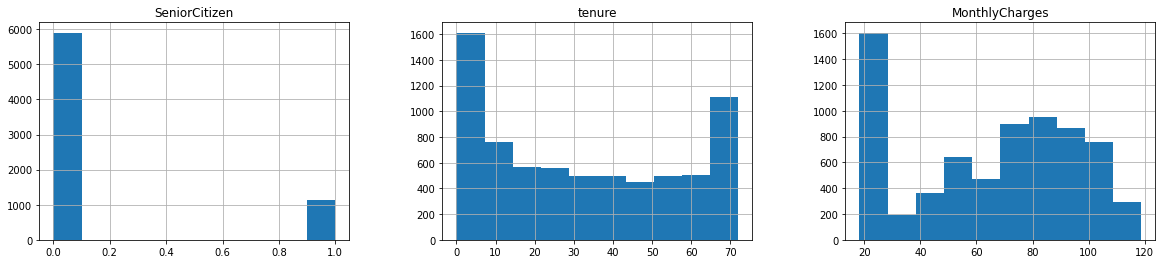

In [15]:
# numdata = data.select_dtypes(include=['number'])
# cols = numdata.columns.values
numdata = data._get_numeric_data()
# numdata.hist(bins=20)

# fig properties
row = 1
col = 3
width = 20
height = 4

# initialize the figure
fig, axes = plt.subplots(row, col,figsize=(width,height))

for ax,numcol in zip(axes.flatten(),numdata.columns.tolist()):
    numdata.hist(column=numcol,ax=ax)
    
plt.show(fig) # force to show the plot after the print

## **26. In a new cell show the box-plots of each numeric variable (i.e., column) in the dataset**
* Hint: try to find a specific method in the DataFrame API documentation
* Does this chart provide a good visualization? Why?
* Try to generate one box-plot for each numerical variable
* Try to put all three charts in the same figure using the subplot function

Not a good visualization because it groups together all the numerical variables:



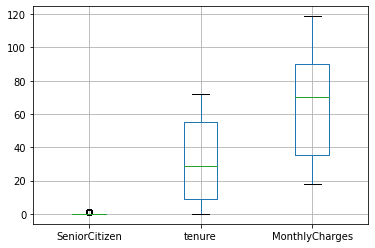


Moreover for 'SeniorCitizen' variable we can not distinguish all the info from the plot.


In [16]:
print("Not a good visualization because it groups together all the numerical variables:\n")
fig1 = numdata.boxplot()
plt.show(fig1) # force to show the plot after the print

print("\nMoreover for 'SeniorCitizen' variable we can not distinguish all the info from the plot.")

To have a good visualization, we can plot each numerical variable in a single boxplot as follows:


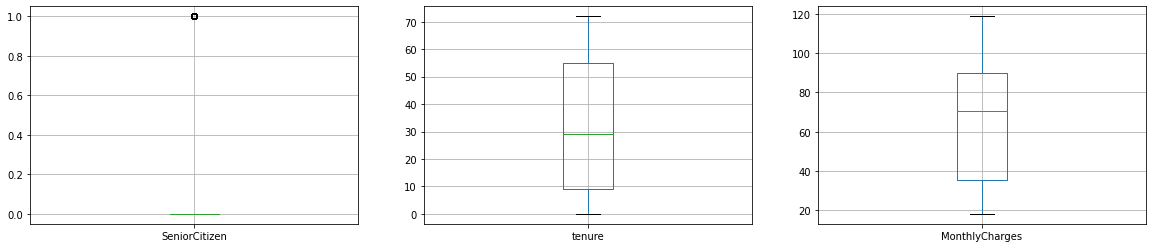

In [17]:
print("To have a good visualization, we can plot each numerical variable in a single boxplot as follows:")

# fig properties
row = 1
col = 3
width = 20
height = 4

# initialize the figure
fig2, axes = plt.subplots(row, col,figsize=(width,height))
# fig.tight_layout()
# #fig.subplots_adjust(wspace=0.2)

for ax,numcol in zip(np.ravel(axes),numdata.columns.tolist()):
    numdata.boxplot(column=numcol,ax=ax)

plt.show(fig2) # force to show the plot after the print

## **27. In a new cell show the histograms of the categorical variables in the dataset**
* Hint: try to use a function from the Seaborn library which counts the number of time each element appears and makes a related bar plot
* Hint: use the subplot function to put all the charts in the same figure
* Hint: resize the figure so that to avoid overlapping and enable a clear visualization of all charts

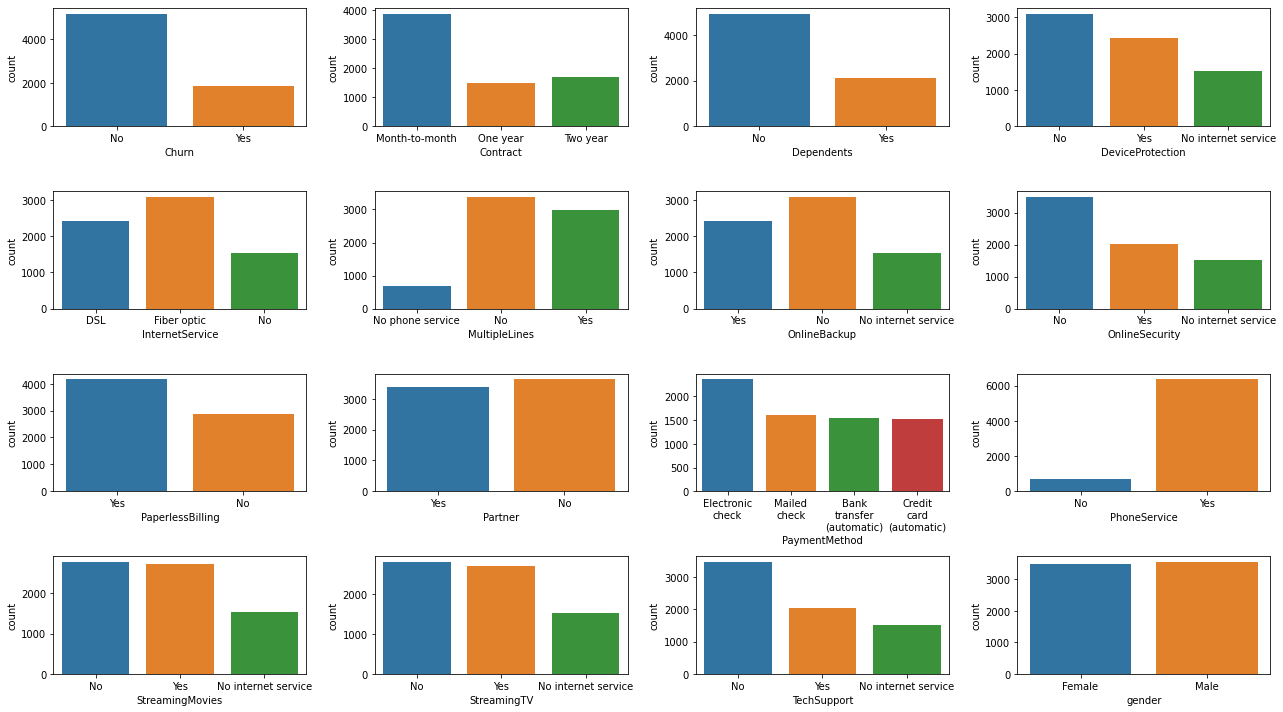

In [18]:
catdata = data.select_dtypes(include=["object"]);

# fig properties
row = 4
col = 4
width = 18
height = 10

fig, axes = plt.subplots(row, col,figsize=(width,height))

# Dropping 'costumerID' and 'TotalCharges' variables because makes too hard to plot!
categorical_variables = catdata[catdata.columns.difference(['customerID','TotalCharges'])].columns.tolist()

for ax,col in zip(axes.flatten(),categorical_variables):
    sns.countplot(data=data, x=col,ax=ax)
    
    # Since for 'PaymentMethod' we have xticklabels which are overlapping    
    if col == 'PaymentMethod':
        #ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right") # rotate x-tick-labels
        wrap_labels(ax, 10) # wrap the words at or before the 10th character

fig.tight_layout()

plt.show(fig) # force to show the plot after the print

## **28. In a new cell generate a new DataFrame called data1 and containing only variables gender, Partner, MonthlyCharges, Churn**
* Hint: you could try also other selections

In [19]:
#data1 = data[['gender','Partner','MonthlyCharges','Churn']]
data1 = pd.DataFrame(data,columns=['gender','Partner','MonthlyCharges','Churn'])

## **29. In a new cell show the first 5 rows of the new dataset**

In [20]:
data1.head(5)

,gender,Partner,MonthlyCharges,Churn
0,Female,Yes,29.85,No
1,Male,No,56.95,No
2,Male,No,53.85,Yes
3,Male,No,42.30,No
4,Female,No,70.70,Yes


# **Prepare the data**

## **30. Convert categorical values in data1 to numeric as follows:**
* **gender: Male=0, Female=1**
* **Partner: No=0, Yes=1**
* **Churn: No=0, Yes=1**

* Hint: find similar code in the Titanic notebook if needed

In [21]:
gender_mapping = {'Male': 0, 'Female': 1}
mapping = {'No': 0, 'Yes': 1}
data1['gender'] = data1['gender'].map(gender_mapping)
# data1['gender'] = data1['gender'].astype(int) # it doesn't need to cast
data1['Partner'] = data1['Partner'].map(mapping)
data1['Churn'] = data1['Churn'].map(mapping)

display(data.loc[:,['gender', 'Partner','Churn']].head())
display(data1.loc[:,['gender', 'Partner','Churn']].head())

,gender,Partner,Churn
0,Female,Yes,No
1,Male,No,No
2,Male,No,Yes
3,Male,No,No
4,Female,No,Yes


,gender,Partner,Churn
0,1,1,0
1,0,0,0
2,0,0,1
3,0,0,0
4,1,0,1


## **31. Generate a separate Series variable called data1Churn for the dependent (churn) variable and drop it from DataFrame data1**
* Hint: Series is a data structure defined in Pandas, try to find its documentation page
* Hint: each column of a DataFrame is a Series
* Hint: learn how to drop columns from a dataset in the Titanoc notebook
* What is the difference between data1[[‘Churn’]] and data1[‘Churn’]?
* When single square brackets are used with Pandas DataFrame? When double brackets are used instead?

In [22]:
## Genereate a series variable:
data1Churn = data1['Churn']
## Dropping "Churn" variable from data1
# data1 = data1.drop("Churn",axis=1) # don't run this twice!
data1 = data1[['gender','Partner','MonthlyCharges']]

The difference between `data1[[‘Churn’]]` and `data1[‘Churn’]` is that:
> `data1[[‘Churn’]]` return a Pandas DataFrame, while `data1[‘Churn’]` returns a Pandas Series.

So according to our needs we choose the more appropriate class to use.

# **Linear Logistic Regression**

## **32. Generate a linear logistic model using data1 as independent variables and data1Churn as dependent variable, then show the model “score”**
* Hint: try to find a function for linear logistic model learning in the sklearn library
* Hint: find similar code in the Titanic notebook if needed

In [23]:
# Logistic Regression

logreg = LogisticRegression()
logreg.fit(data1, data1Churn)
Y_pred = logreg.predict(data1)# test on data1
acc_log = round(logreg.score(data1,data1Churn), 2) # R2
print("The score of the Logistic Regression model is: ",acc_log)

The score of the Logistic Regression model is:  0.72


## **33. Show the parameters of the linear logistic model computed above. Which variable seems to be more related to customer churn?**
* Hint: find similar code in the Titanic notebook if needed

In [24]:
logreg.get_params(deep=True)
# penalty: Specify the norm of the penalty
# for other info see here:
# https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html#sklearn.linear_model.LogisticRegression.get_params

print("The intercept is: ",logreg.intercept_[0],"\n\
The coefficients of our model are: ",logreg.coef_[0][:])

The intercept is:  -1.8510896831170833 
The coefficients of our model are:  [ 0.01730586 -0.83873431  0.01754114]


In [25]:
# Correlation
coeff_data1 = pd.DataFrame(data1.columns)
coeff_data1.columns = ['Feature']
coeff_data1["Correlation"] = pd.Series(logreg.coef_[0])

coeff_data1.sort_values(by='Correlation', ascending=False)

,Feature,Correlation
2,MonthlyCharges,0.017541
0,gender,0.017306
1,Partner,-0.838734


## **34. If you want, click on the Sharing field on the right hand side menu and share the notebook with me (Kaggle user: albertocastellini)**
* No score/evaluation will be given, don’t worry :-)